###**1. Install and Load Packages**

- packages tweet-preprocessor: memudahkan untuk membersihkan, mengurai, atau memberi token pada tweet.
- packages pyLDAvis: LDA (Latent Dirichlet Allocation) membantu dalam metode *Topic Modelling*

In [ ]:
# Install packages
! pip install tweet-preprocessor
!pip install pyldavis

In [ ]:
# Install pandas versi 1.3.0
  # (untuk mempermudah proses transformasi data)
! pip install pandas

In [ ]:
pip install numpy==1.25.0

In [ ]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
import preprocessor as p
import numpy as np
import networkx as nx
import wordcloud
import nltk
import warnings
import itertools
import re
import os
import random
import pyLDAvis
import pyLDAvis.lda_model

In [ ]:
# Import module
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm
from nltk import bigrams
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Set parameter
 # (untuk mengabaikan 'filter warnings')
warnings.filterwarnings('ignore')
pyLDAvis.enable_notebook()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import community
import seaborn as sns
import warnings
import re
warnings.filterwarnings("ignore")

In [ ]:
# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 https://deb.nodesource.com/node_20.x nodistro InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ca-certificates is already the newest version (20230311ubuntu0.22.04.1).
cu

### **2. Import Data**
Dataset yang digunakan berasal dari Twitter boycottstarbucks

In [ ]:
filename = 'boycottStarbucks.csv'
search_keyword = 'BoycottStarbucks until:2023-12-27 since:2018-03-01 min_faves:0 lang:en'
limit = 800

!npx --yes tweet-harvest@latest -o "{filename}" -s "{search_keyword}" -l {limit} --token ""


Welcome to the Twitter Crawler 🕷️

This script uses Chromium Browser to crawl data from Twitter with *your* Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.

? What's your Twitter auth token? › 78? What's your Twitter auth token? › *78? What's your Twitter auth token? › **78? What's your Twitter auth token? › ***78? What's your Twitter auth token? › ****78? What's your Twitter auth token? › *****78? What's your Twitter auth token? › ******78? What's your Twitter auth token? › *******78? What's your Twitter auth token? › ********78? What's your Twitter auth token? › *********78? What's your Twitter auth token? › **********78? What's your Twitter auth token? › ***********78? What's your Twitter auth token? › ************78? What's your Twitter auth token? › *************78? What's your Twitter auth token? › **********

'BoycottStarbucks until:2023-12-27 since:2018-03-01 min_faves:0 lang:en'
limit = 800
BoycottStarbucks adalah hastag atau topik yang ingin digunakan
until:2023-12-27 since:2018-03-01 adalah tanggal postnya
min_faves:0 minimal likenya adalah 0
limit : batas crawl data yang ingin diambil
lang adalah bahasa yang digunakan

PREPROCESSING DATA

In [ ]:
# Specify the path to your CSV file
file_path = f"tweets-data/{filename}"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path, delimiter=",")

# Display the DataFrame
df.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,image_url,location
0,Wed Dec 20 07:49:07 +0000 2023,1737379590153421274,Boycotting works! #ZionistTerroristIsrael #Ga...,0,1,9,16,en,777367587168645120,1737379590153421274,Mango_peopel,https://twitter.com/Mango_peopel/status/173737...,https://pbs.twimg.com/media/GBxphBsasAAW2aO.jpg,"Wah Cantt Punjab, Pakistan"
1,Sat Dec 23 20:20:38 +0000 2023,1738655877090140550,Queensboro Bridge New York 🇵🇸 #GenocideJoe #...,15,35,358,750,en,254716573,1738655877090140550,stoppression,https://twitter.com/stoppression/status/173865...,https://pbs.twimg.com/ext_tw_video_thumb/17386...,"Hyderabad, India"
2,Fri Dec 22 19:51:31 +0000 2023,1738286161183858859,@DrLoupis We don’t want the genocide drink 🙄 #...,4,10,211,880,en,1717994261990240256,1738282848333791491,heba_8308,https://twitter.com/heba_8308/status/173828616...,https://pbs.twimg.com/media/GB-iC_BXsAErccm.jpg,Kuwait
3,Fri Dec 22 10:43:38 +0000 2023,1738148283258745257,New soldiers to commit the Palestinian Genocid...,4,22,85,96,en,106515221,1738148283258745257,SDGMasterglass,https://twitter.com/SDGMasterglass/status/1738...,https://pbs.twimg.com/ext_tw_video_thumb/17381...,"Nürnberg, Deutschland"
4,Sat Dec 23 20:17:35 +0000 2023,1738655109259948070,Demonstrations opposing The Zionists genocide ...,13,28,398,905,en,254716573,1738655109259948070,stoppression,https://twitter.com/stoppression/status/173865...,https://pbs.twimg.com/ext_tw_video_thumb/17386...,"Hyderabad, India"


Menampilkan data yang telah dimining dari Twitter

In [ ]:
pola = r'@([A-Za-z0-9_]+)'
def bersihkan_teks(teks):
    usernames = re.findall(pola, teks)
    return ', '.join(usernames)

membuat colum username yang berasal dari hasil mention pada hasil column full text

In [ ]:
# Lihat 10 baris pertama data
df.head(10)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,image_url,location
0,Wed Dec 20 07:49:07 +0000 2023,1737379590153421274,Boycotting works! #ZionistTerroristIsrael #Ga...,0,1,9,16,en,777367587168645120,1737379590153421274,Mango_peopel,https://twitter.com/Mango_peopel/status/173737...,https://pbs.twimg.com/media/GBxphBsasAAW2aO.jpg,"Wah Cantt Punjab, Pakistan"
1,Sat Dec 23 20:20:38 +0000 2023,1738655877090140550,Queensboro Bridge New York 🇵🇸 #GenocideJoe #...,15,35,358,750,en,254716573,1738655877090140550,stoppression,https://twitter.com/stoppression/status/173865...,https://pbs.twimg.com/ext_tw_video_thumb/17386...,"Hyderabad, India"
2,Fri Dec 22 19:51:31 +0000 2023,1738286161183858859,@DrLoupis We don’t want the genocide drink 🙄 #...,4,10,211,880,en,1717994261990240256,1738282848333791491,heba_8308,https://twitter.com/heba_8308/status/173828616...,https://pbs.twimg.com/media/GB-iC_BXsAErccm.jpg,Kuwait
3,Fri Dec 22 10:43:38 +0000 2023,1738148283258745257,New soldiers to commit the Palestinian Genocid...,4,22,85,96,en,106515221,1738148283258745257,SDGMasterglass,https://twitter.com/SDGMasterglass/status/1738...,https://pbs.twimg.com/ext_tw_video_thumb/17381...,"Nürnberg, Deutschland"
4,Sat Dec 23 20:17:35 +0000 2023,1738655109259948070,Demonstrations opposing The Zionists genocide ...,13,28,398,905,en,254716573,1738655109259948070,stoppression,https://twitter.com/stoppression/status/173865...,https://pbs.twimg.com/ext_tw_video_thumb/17386...,"Hyderabad, India"
5,Fri Dec 22 13:48:22 +0000 2023,1738194770655076635,palestine.pixel | The occupation continues its...,10,6,121,120,en,106515221,1738194770655076635,SDGMasterglass,https://twitter.com/SDGMasterglass/status/1738...,https://pbs.twimg.com/ext_tw_video_thumb/17381...,"Nürnberg, Deutschland"
6,Sat Dec 23 20:36:00 +0000 2023,1738659744691470461,#RESPECT | The city of Bethlehem in the occupi...,24,26,288,526,en,254716573,1738659744691470461,stoppression,https://twitter.com/stoppression/status/173865...,https://pbs.twimg.com/ext_tw_video_thumb/17386...,"Hyderabad, India"
7,Fri Dec 22 14:02:06 +0000 2023,1738198227919528006,Don't believe anyone that says boycott doesn't...,2,0,15,24,en,1555183372950835200,1738198227919528006,maahin_7,https://twitter.com/maahin_7/status/1738198227...,https://pbs.twimg.com/ext_tw_video_thumb/17367...,worldwide
8,Wed Dec 20 01:22:49 +0000 2023,1737282374298108134,Your boycott matters! Keep going! #FreePalest...,11,10,76,130,en,386236562,1737282374298108134,akaNadaKhaled,https://twitter.com/akaNadaKhaled/status/17372...,https://pbs.twimg.com/media/GBwRHBWWkAA7oYM.jpg,Hogwarts / Panem / The Maze
9,Fri Dec 22 19:50:08 +0000 2023,1738285812372942942,Starbucks calling for peace. Lol These people...,1,42,58,197,en,1062859889264021504,1738285812372942942,Shirinkhan0,https://twitter.com/Shirinkhan0/status/1738285...,https://pbs.twimg.com/media/GB-huYIWcAA_TVt.jpg,USA


In [ ]:
# Melihat ringkasan singkat dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           158 non-null    object
 1   id_str               158 non-null    int64 
 2   full_text            158 non-null    object
 3   quote_count          158 non-null    int64 
 4   reply_count          158 non-null    int64 
 5   retweet_count        158 non-null    int64 
 6   favorite_count       158 non-null    int64 
 7   lang                 158 non-null    object
 8   user_id_str          158 non-null    int64 
 9   conversation_id_str  158 non-null    int64 
 10  username             158 non-null    object
 11  tweet_url            158 non-null    object
 12  image_url            123 non-null    object
 13  location             103 non-null    object
dtypes: int64(7), object(7)
memory usage: 17.4+ KB


In [ ]:
df['mention_username'] = df['full_text'].apply(bersihkan_teks)


In [ ]:
df['mention_username'] = df['mention_username'].fillna('')

In [ ]:
df.to_csv('BoycottStarbucks_clean.csv', index=False)

In [ ]:
df2 = pd.read_csv('BoycottStarbucks_clean.csv')  # Ganti 'nama_file_hasil.csv' dengan nama file output yang sesuai

In [ ]:
df2.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,image_url,location,mention_username
0,Wed Dec 20 07:49:07 +0000 2023,1737379590153421274,Boycotting works! #ZionistTerroristIsrael #Ga...,0,1,9,16,en,777367587168645120,1737379590153421274,Mango_peopel,https://twitter.com/Mango_peopel/status/173737...,https://pbs.twimg.com/media/GBxphBsasAAW2aO.jpg,"Wah Cantt Punjab, Pakistan",NaN
1,Sat Dec 23 20:20:38 +0000 2023,1738655877090140550,Queensboro Bridge New York 🇵🇸 #GenocideJoe #...,15,35,358,750,en,254716573,1738655877090140550,stoppression,https://twitter.com/stoppression/status/173865...,https://pbs.twimg.com/ext_tw_video_thumb/17386...,"Hyderabad, India",NaN
2,Fri Dec 22 19:51:31 +0000 2023,1738286161183858859,@DrLoupis We don’t want the genocide drink 🙄 #...,4,10,211,880,en,1717994261990240256,1738282848333791491,heba_8308,https://twitter.com/heba_8308/status/173828616...,https://pbs.twimg.com/media/GB-iC_BXsAErccm.jpg,Kuwait,DrLoupis
3,Fri Dec 22 10:43:38 +0000 2023,1738148283258745257,New soldiers to commit the Palestinian Genocid...,4,22,85,96,en,106515221,1738148283258745257,SDGMasterglass,https://twitter.com/SDGMasterglass/status/1738...,https://pbs.twimg.com/ext_tw_video_thumb/17381...,"Nürnberg, Deutschland",NaN
4,Sat Dec 23 20:17:35 +0000 2023,1738655109259948070,Demonstrations opposing The Zionists genocide ...,13,28,398,905,en,254716573,1738655109259948070,stoppression,https://twitter.com/stoppression/status/173865...,https://pbs.twimg.com/ext_tw_video_thumb/17386...,"Hyderabad, India",NaN


In [ ]:
# Display the column names in your DataFrame
print(df.columns)

Index(['created_at', 'id_str', 'full_text', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'lang', 'user_id_str',
       'conversation_id_str', 'username', 'tweet_url', 'image_url', 'location',
       'mention_username'],
      dtype='object')


### **3. Text Preprocessing**
Proses pengolahan data

In [ ]:
# Pilih kolom 'TEXT' saja
tweet = df[['full_text']]

# Lihat 5 baris pertama data
tweet.head()

,full_text
0,Boycotting works! #ZionistTerroristIsrael #Ga...
1,Queensboro Bridge New York 🇵🇸 #GenocideJoe #...
2,@DrLoupis We don’t want the genocide drink 🙄 #...
3,New soldiers to commit the Palestinian Genocid...
4,Demonstrations opposing The Zionists genocide ...


Text preprocessing memiliki peran krusial dalam text mining, yang merupakan suatu proses ekstraksi informasi yang berharga dan berarti dari teks. Berikut adalah beberapa kegunaan utama text processing dalam text mining: Transformation, Tokenization, Stemming dan Lemmatization, Stopword Removal, dan  Rejoin Token

#### **a. Transformation**
Membersihkan dataset dari URLs, hashtags, mentions, RT & Fav, emoji, smileys, & number menggunakan packages tweet-preprocessor. Dilanjutkan dengan mengubah huruf pada dataset menjadi huruf kecil (lowercase)

Case Folding merupakan proses untuk mengkonversi teks ke dalam format huruf kecil (lowercase). Hal ini bertujuan untuk memberikan bentuk standar pada teks.

In [ ]:
# Membuat fungsi transformasi tweet
 # dilanjutkan dengan mengubah huruf pada dataset menjadi lowercase

def transform_tweet(row):
  tweet = row['full_text']
  tweet = p.clean(tweet)
  tweet = str.lower(tweet)
  return tweet

In [ ]:
# Mengaplikasikan fungsi transformasi dengan membuat kolom baru di dataset
tweet['transformed'] = tweet.apply(transform_tweet, axis=1)

# Lihat 5 baris pertama data
tweet.head()

# kolom 'text' merupakan teks sebelum diubah
# kolom 'transformed' merupakan teks setelah melalui proses transformasi (cleaning)

,full_text,transformed
0,Boycotting works! #ZionistTerroristIsrael #Ga...,boycotting works!
1,Queensboro Bridge New York 🇵🇸 #GenocideJoe #...,queensboro bridge new york
2,@DrLoupis We don’t want the genocide drink 🙄 #...,we dont want the genocide drink
3,New soldiers to commit the Palestinian Genocid...,new soldiers to commit the palestinian genocid...
4,Demonstrations opposing The Zionists genocide ...,demonstrations opposing the zionists genocide ...


#### **b. Tokenization**
Memotong teks menjadi unit yang lebih kecil yang disebut 'token'

In [ ]:
# Download Punkt
# Punkt merupakan alat 'Tokenizer' yang membagi teks menjadi unit-unit yang lebih kecil
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Membuat fungsi tokenization

def tokenize_tweet(row):
    tweet = row['transformed']
    tokens = nltk.word_tokenize(tweet)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

In [ ]:
# Mengaplikasikan fungsi tokenization dengan membuat kolom baru di dataset
tweet['tokenized'] = tweet.apply(tokenize_tweet, axis=1)

# Lihat 5 baris pertama data
tweet.head()

# kolom 'text' merupakan teks sebelum diubah
# kolom 'transformed' merupakan teks setelah melalui proses transformasi (cleaning)
# kolom 'tokenized' merupakan teks setelah melalui proses tokenization

,full_text,transformed,tokenized
0,Boycotting works! #ZionistTerroristIsrael #Ga...,boycotting works!,"[boycotting, works]"
1,Queensboro Bridge New York 🇵🇸 #GenocideJoe #...,queensboro bridge new york,"[queensboro, bridge, new, york]"
2,@DrLoupis We don’t want the genocide drink 🙄 #...,we dont want the genocide drink,"[we, dont, want, the, genocide, drink]"
3,New soldiers to commit the Palestinian Genocid...,new soldiers to commit the palestinian genocid...,"[new, soldiers, to, commit, the, palestinian, ..."
4,Demonstrations opposing The Zionists genocide ...,demonstrations opposing the zionists genocide ...,"[demonstrations, opposing, the, zionists, geno..."


#### **c. Stemming**
Stemming adalah proses pengubahan bentuk kata menjadi kata dasar atau tahap mencari root dari tiap kata.

Tujuan dari stemming sebenarnya adalah meningkatkan performance dan
mengurangi penggunaan resource dari system dengan mengurangi jumlah unique
word yang harus diakomodasikan oleh sistem

In [ ]:
# Membuat fungsi stemming
def stemming_tweet(row):
    list = row['tokenized']
    stemming_list = [PorterStemmer().stem(w) for w in list]
    return(stemming_list)

In [ ]:
# Mengaplikasikan fungsi stemming dengan membuat kolom baru di dataset
tweet['stemmed'] = tweet.apply(stemming_tweet, axis=1)

# Lihat 5 baris pertama data
tweet.head()

# kolom 'text' merupakan teks sebelum diubah
# kolom 'transformed' merupakan teks setelah melalui proses transformasi (cleaning)
# kolom 'tokenized' merupakan teks setelah melalui proses tokenization
# kolom 'stemmed' merupakan teks setelah melalui proses stemming

,full_text,transformed,tokenized,stemmed
0,Boycotting works! #ZionistTerroristIsrael #Ga...,boycotting works!,"[boycotting, works]","[boycot, work]"
1,Queensboro Bridge New York 🇵🇸 #GenocideJoe #...,queensboro bridge new york,"[queensboro, bridge, new, york]","[queensboro, bridg, new, york]"
2,@DrLoupis We don’t want the genocide drink 🙄 #...,we dont want the genocide drink,"[we, dont, want, the, genocide, drink]","[we, dont, want, the, genocid, drink]"
3,New soldiers to commit the Palestinian Genocid...,new soldiers to commit the palestinian genocid...,"[new, soldiers, to, commit, the, palestinian, ...","[new, soldier, to, commit, the, palestinian, g..."
4,Demonstrations opposing The Zionists genocide ...,demonstrations opposing the zionists genocide ...,"[demonstrations, opposing, the, zionists, geno...","[demonstr, oppos, the, zionist, genocid, on, a..."


#### **d. Lemmatization**
Mengubah kata menjadi bentuk dasar umum menggunakan analisis morfologi. Lemmatization biasanya lebih baik hasilnya dari Stemming. Stemming hanya memotong kata, sedangkan Lemmatization memotong kata dan menggunakan dictionary yang lebih lengkap.

In [ ]:
# Download Wordnet
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Membuat fungsi lemmatization
def lemmatize_tweet(row):
    list = row['tokenized']
    lemmatize_list = [WordNetLemmatizer().lemmatize(w, pos= 'v') for w in list]
    return(lemmatize_list)

In [ ]:
# Mengaplikasikan fungsi lemmatization dengan membuat kolom baru di dataset
tweet['lemmatized'] = tweet.apply(lemmatize_tweet, axis=1)

# Lihat 5 baris pertama data
tweet.head(15)

# kolom 'text' merupakan teks sebelum diubah
# kolom 'transformed' merupakan teks setelah melalui proses transformasi (cleaning)
# kolom 'tokenized' merupakan teks setelah melalui proses tokenization
# kolom 'stemmed' merupakan teks setelah melalui proses stemming
# kolom 'lemmatized' merupakan teks setelah melalui proses lemmatization

,full_text,transformed,tokenized,stemmed,lemmatized
0,Boycotting works! #ZionistTerroristIsrael #Ga...,boycotting works!,"[boycotting, works]","[boycot, work]","[boycott, work]"
1,Queensboro Bridge New York 🇵🇸 #GenocideJoe #...,queensboro bridge new york,"[queensboro, bridge, new, york]","[queensboro, bridg, new, york]","[queensboro, bridge, new, york]"
2,@DrLoupis We don’t want the genocide drink 🙄 #...,we dont want the genocide drink,"[we, dont, want, the, genocide, drink]","[we, dont, want, the, genocid, drink]","[we, dont, want, the, genocide, drink]"
3,New soldiers to commit the Palestinian Genocid...,new soldiers to commit the palestinian genocid...,"[new, soldiers, to, commit, the, palestinian, ...","[new, soldier, to, commit, the, palestinian, g...","[new, soldier, to, commit, the, palestinian, g..."
4,Demonstrations opposing The Zionists genocide ...,demonstrations opposing the zionists genocide ...,"[demonstrations, opposing, the, zionists, geno...","[demonstr, oppos, the, zionist, genocid, on, a...","[demonstrations, oppose, the, zionists, genoci..."
5,palestine.pixel | The occupation continues its...,palestine.pixel | the occupation continues its...,"[the, occupation, continues, its, war, of, ext...","[the, occup, continu, it, war, of, extermin, i...","[the, occupation, continue, its, war, of, exte..."
6,#RESPECT | The city of Bethlehem in the occupi...,| the city of bethlehem in the occupied west b...,"[the, city, of, bethlehem, in, the, occupied, ...","[the, citi, of, bethlehem, in, the, occupi, we...","[the, city, of, bethlehem, in, the, occupy, we..."
7,Don't believe anyone that says boycott doesn't...,don't believe anyone that says boycott doesn't...,"[do, believe, anyone, that, says, boycott, doe...","[do, believ, anyon, that, say, boycott, doe, w...","[do, believe, anyone, that, say, boycott, do, ..."
8,Your boycott matters! Keep going! #FreePalest...,your boycott matters! keep going!,"[your, boycott, matters, keep, going]","[your, boycott, matter, keep, go]","[your, boycott, matter, keep, go]"
9,Starbucks calling for peace. Lol These people...,starbucks calling for peace. lol these people ...,"[starbucks, calling, for, peace, lol, these, p...","[starbuck, call, for, peac, lol, these, peopl,...","[starbucks, call, for, peace, lol, these, peop..."


#### **e. Stopword Removal**
Menghapus kata yang tidak menambahkan arti pada kalimat.
Contoh:
>
English: a, about, be, because, being, between, by, can't, do, during, from, have, he, she, him, her, it, is, i'm, you, too, they, this, etc.
>
Indonesian: ada, agar, apa, nah, pula, pun, itu, dan, wah, yang, atau, dll.




In [ ]:
# Download stopword bahasa inggris
nltk.download('stopwords')
stops = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Membuat fungsi stopword
def stopword_tweet(row):
    list = row['lemmatized']
    stopword_list = [w for w in list if not w in stops]
    return(stopword_list)

In [ ]:
# Mengaplikasikan fungsi Stopword dengan membuat kolom baru di dataset
tweet['stopword'] = tweet.apply(stopword_tweet, axis=1)

# Lihat 5 baris pertama data
tweet.head(10)

# kolom 'text' merupakan teks sebelum diubah
# kolom 'transformed' merupakan teks setelah melalui proses transformasi (cleaning)
# kolom 'tokenized' merupakan teks setelah melalui proses tokenization
# kolom 'stemmed' merupakan teks setelah melalui proses stemming
# kolom 'lemmatized' merupakan teks setelah melalui proses lemmatization
# kolom 'stopword' merupakan teks setelah melalui proses stopword removal

,full_text,transformed,tokenized,stemmed,lemmatized,stopword
0,Boycotting works! #ZionistTerroristIsrael #Ga...,boycotting works!,"[boycotting, works]","[boycot, work]","[boycott, work]","[boycott, work]"
1,Queensboro Bridge New York 🇵🇸 #GenocideJoe #...,queensboro bridge new york,"[queensboro, bridge, new, york]","[queensboro, bridg, new, york]","[queensboro, bridge, new, york]","[queensboro, bridge, new, york]"
2,@DrLoupis We don’t want the genocide drink 🙄 #...,we dont want the genocide drink,"[we, dont, want, the, genocide, drink]","[we, dont, want, the, genocid, drink]","[we, dont, want, the, genocide, drink]","[dont, want, genocide, drink]"
3,New soldiers to commit the Palestinian Genocid...,new soldiers to commit the palestinian genocid...,"[new, soldiers, to, commit, the, palestinian, ...","[new, soldier, to, commit, the, palestinian, g...","[new, soldier, to, commit, the, palestinian, g...","[new, soldier, commit, palestinian, genocide, ..."
4,Demonstrations opposing The Zionists genocide ...,demonstrations opposing the zionists genocide ...,"[demonstrations, opposing, the, zionists, geno...","[demonstr, oppos, the, zionist, genocid, on, a...","[demonstrations, oppose, the, zionists, genoci...","[demonstrations, oppose, zionists, genocide, l..."
5,palestine.pixel | The occupation continues its...,palestine.pixel | the occupation continues its...,"[the, occupation, continues, its, war, of, ext...","[the, occup, continu, it, war, of, extermin, i...","[the, occupation, continue, its, war, of, exte...","[occupation, continue, war, extermination, gaz..."
6,#RESPECT | The city of Bethlehem in the occupi...,| the city of bethlehem in the occupied west b...,"[the, city, of, bethlehem, in, the, occupied, ...","[the, citi, of, bethlehem, in, the, occupi, we...","[the, city, of, bethlehem, in, the, occupy, we...","[city, bethlehem, occupy, west, bank, birthpla..."
7,Don't believe anyone that says boycott doesn't...,don't believe anyone that says boycott doesn't...,"[do, believe, anyone, that, says, boycott, doe...","[do, believ, anyon, that, say, boycott, doe, w...","[do, believe, anyone, that, say, boycott, do, ...","[believe, anyone, say, boycott, work, starbuck..."
8,Your boycott matters! Keep going! #FreePalest...,your boycott matters! keep going!,"[your, boycott, matters, keep, going]","[your, boycott, matter, keep, go]","[your, boycott, matter, keep, go]","[boycott, matter, keep, go]"
9,Starbucks calling for peace. Lol These people...,starbucks calling for peace. lol these people ...,"[starbucks, calling, for, peace, lol, these, p...","[starbuck, call, for, peac, lol, these, peopl,...","[starbucks, call, for, peace, lol, these, peop...","[starbucks, call, peace, lol, people, liars, d..."


#### **f. Rejoin Token**
Menggabungkan token / kata-kata yang telah sampai proses stopword menjadi kalimat utuh.

In [ ]:
# Membuat fungsi rejoin untuk mengembalikan sebagai kalimat utuh
def rejoin_tweet(row):
    list = row['stopword']
    joined_words = ( " ".join(list))
    return joined_words

In [ ]:
# Mengaplikasikan fungsi rejoin dengan membuat kolom baru di dataset
tweet['final'] = tweet.apply(rejoin_tweet, axis=1)

# Lihat 5 baris pertama data
tweet.head()

# kolom 'text' merupakan teks sebelum diubah
# kolom 'transformed' merupakan teks setelah melalui proses transformasi (cleaning)
# kolom 'tokenized' merupakan teks setelah melalui proses tokenization
# kolom 'stemmed' merupakan teks setelah melalui proses stemming
# kolom 'lemmatized' merupakan teks setelah melalui proses lemmatization
# kolom 'stopword' merupakan teks setelah melalui proses stopword removal
# kolom 'final' merupakan teks setelah melalui proses rejoin token

,full_text,transformed,tokenized,stemmed,lemmatized,stopword,final
0,Boycotting works! #ZionistTerroristIsrael #Ga...,boycotting works!,"[boycotting, works]","[boycot, work]","[boycott, work]","[boycott, work]",boycott work
1,Queensboro Bridge New York 🇵🇸 #GenocideJoe #...,queensboro bridge new york,"[queensboro, bridge, new, york]","[queensboro, bridg, new, york]","[queensboro, bridge, new, york]","[queensboro, bridge, new, york]",queensboro bridge new york
2,@DrLoupis We don’t want the genocide drink 🙄 #...,we dont want the genocide drink,"[we, dont, want, the, genocide, drink]","[we, dont, want, the, genocid, drink]","[we, dont, want, the, genocide, drink]","[dont, want, genocide, drink]",dont want genocide drink
3,New soldiers to commit the Palestinian Genocid...,new soldiers to commit the palestinian genocid...,"[new, soldiers, to, commit, the, palestinian, ...","[new, soldier, to, commit, the, palestinian, g...","[new, soldier, to, commit, the, palestinian, g...","[new, soldier, commit, palestinian, genocide, ...",new soldier commit palestinian genocide vomit
4,Demonstrations opposing The Zionists genocide ...,demonstrations opposing the zionists genocide ...,"[demonstrations, opposing, the, zionists, geno...","[demonstr, oppos, the, zionist, genocid, on, a...","[demonstrations, oppose, the, zionists, genoci...","[demonstrations, oppose, zionists, genocide, l...",demonstrations oppose zionists genocide la sca...


In [ ]:
# Final tweet yang sudah di proses
 # mengubah nama kolom "final" menjadi "text" untuk ditampilkan dengan variabel tweet_clean

tweet_clean = tweet[['final']]
tweet_clean = tweet_clean.rename(columns={'final': 'text'})

# Lihat 5 baris pertama data
tweet_clean.head()

,text
0,boycott work
1,queensboro bridge new york
2,dont want genocide drink
3,new soldier commit palestinian genocide vomit
4,demonstrations oppose zionists genocide la sca...


### **4. WordCloud**
WordCloud merupakan bagian dari Content Description untuk melihat kemunculan dari kata-kata. Kata yang ukurannya paling besar yang muncul merupakan kata yang paling banyak kuantitasnya dalam dataset.

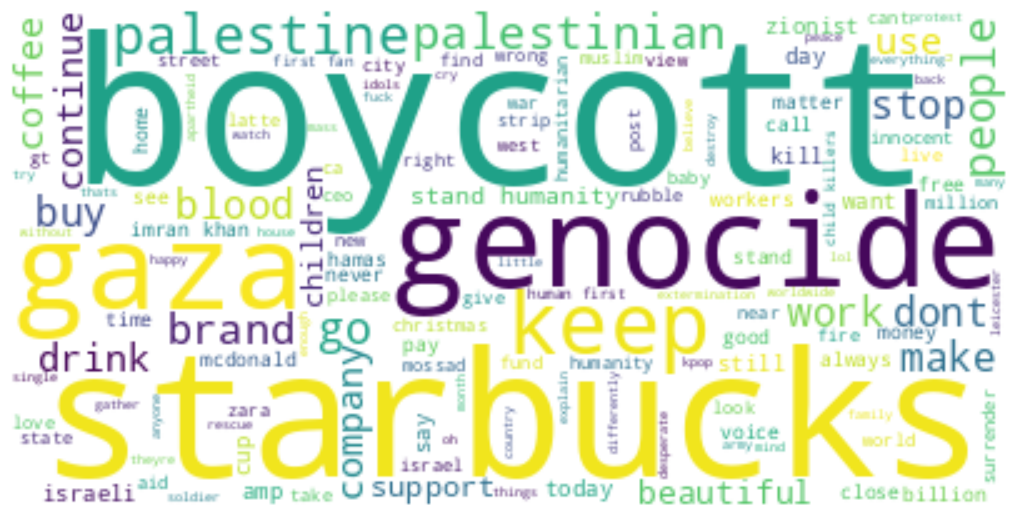

In [ ]:
# Visualisasi Word Cloud
text_wordcloud = " ".join(tweet for tweet in tweet_clean.text)

cloud = WordCloud(background_color='white').generate(text_wordcloud)

plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### **5. Sentiment Analysis**

In [ ]:
# Download corpus untuk sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
listy = []
for index, row in tweet_clean.iterrows():
  ss = sid.polarity_scores(row['text'])
  listy.append(ss)

se = pd.Series(listy)
tweet_clean['polarity'] = se.values
display(tweet_clean.head(15))

,text,polarity
0,boycott work,"{'neg': 0.697, 'neu': 0.303, 'pos': 0.0, 'comp..."
1,queensboro bridge new york,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,dont want genocide drink,"{'neg': 0.289, 'neu': 0.711, 'pos': 0.0, 'comp..."
3,new soldier commit palestinian genocide vomit,"{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'comp..."
4,demonstrations oppose zionists genocide la sca...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5,occupation continue war extermination gaza strip,"{'neg': 0.438, 'neu': 0.562, 'pos': 0.0, 'comp..."
6,city bethlehem occupy west bank birthplace jes...,"{'neg': 0.27, 'neu': 0.504, 'pos': 0.227, 'com..."
7,believe anyone say boycott work starbucks mont...,"{'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'comp..."
8,boycott matter keep go,"{'neg': 0.426, 'neu': 0.37, 'pos': 0.204, 'com..."
9,starbucks call peace lol people liars dont bel...,"{'neg': 0.178, 'neu': 0.313, 'pos': 0.509, 'co..."


setiap text atau kalimat memiliki porsi negatif/netral/positif. untuk kalimat pertama, cenderung negatif

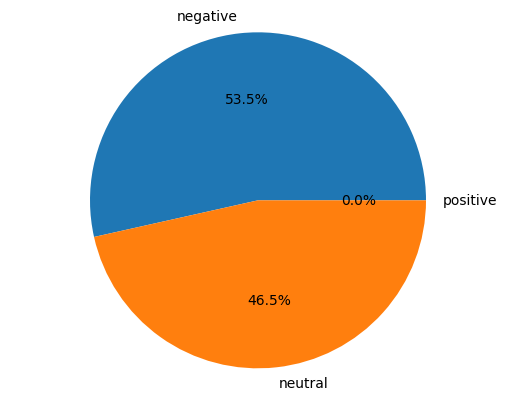

In [ ]:
# Visualisasi Pie Chart
labels = ['negative', 'neutral', 'positive']
sizes  = [ss['neg'], ss['neu'], ss['pos']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

dari dataset tersebut, sebanyak 46.5% bersifat netral, 53.5% negatif dan 0% positive. data bersifat negatif

> Pemblokiran indentasi



### **6. Topic Modelling**

In [ ]:
# clone tambahan library dari github
! git clone https://github.com/machine-learning-ss/tm

# Set Data Directory
os.chdir('tm')

Cloning into 'tm'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (7/7), 620.28 KiB | 7.38 MiB/s, done.


In [ ]:
# Melihat total loaded tweets

import MyLib as TS

Tweets = tweet_clean['text']
print('Total loaded tweets = {0}'.format(len(Tweets)))

Total loaded tweets = 158


total twwets yang akan diolah yaitu sebanyak 158 data

In [ ]:
# Menentukan banyaknya jumlah topik dan kata-kata yang akan diambil
n_topics = 5
top_topics = 5
top_words = 10

topik yang ingin diambil ada 5 topik. dengan top topik dan top words nya adalah 5 dan 10

In [ ]:
# Feature Extraction
count_vector = CountVectorizer(token_pattern=r'\b[a-zA-Z]{3,}\b')
dtm_tf = count_vector.fit_transform(Tweets)
tf_terms = count_vector.get_feature_names_out()

100%|██████████| 158/158 [00:00<00:00, 30520.89it/s]


In total there are 5 major topics, distributed as follows


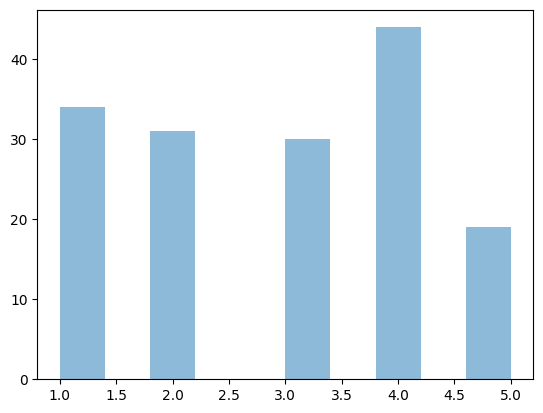

Printing top 5 Topics, with top 10 Words:
Topic #0:
starbucks humanity genocide gaza children stand always people first human
Topic #1:
boycott keep starbucks work still billion line lose near market
Topic #2:
boycott people home brand find never starbucks rubble want lol
Topic #3:
boycott palestine buy genocide dont stop die continue starbucks brand
Topic #4:
cant make blood drink coffee fuck money little cup name


In [ ]:
# Fungsi untuk mencari topic
lda_tf = LatentDirichletAllocation(n_components=n_topics, learning_method='online', random_state=0).fit(dtm_tf)

# Menampilkan Topik
vsm_topics = lda_tf.transform(dtm_tf); doc_topic =  [a.argmax()+1 for a in tqdm(vsm_topics)] # topic of docs
print('In total there are {0} major topics, distributed as follows'.format(len(set(doc_topic))))
plt.hist(np.array(doc_topic), alpha=0.5); plt.show()
print('Printing top {0} Topics, with top {1} Words:'.format(top_topics, top_words))
TS.print_Topics(lda_tf, tf_terms, top_topics, top_words)

dari 4 topic teratas, topik keempat (topic #3) memiliki frekuensi yg paling banyak dibandingkan dengan topik yg lain.

In [ ]:
pyLDAvis.lda_model.prepare(lda_tf, dtm_tf, count_vector)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.049147 -0.063661       1        1  25.019628
0      0.103284 -0.012874       2        1  22.820447
2     -0.085612  0.084244       3        1  19.572166
1     -0.026444 -0.069460       4        1  18.824629
4      0.057919  0.061751       5        1  13.763130, topic_info=          Term       Freq      Total Category  logprob  loglift
67     boycott  33.000000  33.000000  Default  30.0000  30.0000
305       keep   8.000000   8.000000  Default  29.0000  29.0000
424  palestine   7.000000   7.000000  Default  28.0000  28.0000
269       home   4.000000   4.000000  Default  27.0000  27.0000
82        cant   3.000000   3.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
567       take   1.487147   2.904330   Topic5  -4.6949   1.3138
109     coffee   1.899911   3.760686   Topic5  -4.4500   1.3004
135        cup   1.560842   4.746005   Topic5  -4.6466   0.8711
258       hear   1.446916   3.673156   Topic5  -4.7224   1.0516
613      voice   1.427345   3.048432   Topic5  -4.7360   1.2244

[228 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
3         3  0.876811  acknowledge
8         2  0.654031          aid
9         3  0.874901        aipac
12        3  0.881836      already
13        3  0.873312         also
...     ...       ...          ...
647       3  0.877519        worse
648       2  0.662064        would
649       2  0.646645        wrong
653       4  0.802947         yeah
658       5  0.477713        youre

[241 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2, 5])

di sebelah kanan, terdapat urutan kata teratas berdasarkan topik.setiap topik memiliki kata teratas nya masing2.